In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
#%matplotlib inline

from keras.layers import Dense, Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils

C:\Users\RAHUL TIWARI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DataDir="C:/Users/RAHUL TIWARI/Desktop/iitk/train"
Categories=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen',
            'Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse',
            'Small-flowered Cranesbill','Sugar beet']

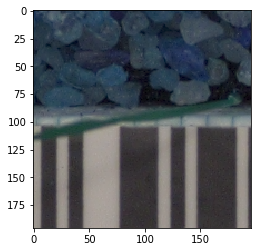

In [3]:
for category in Categories:
    path=os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category)
        class_num=Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(200,200))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

4750


In [5]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(training_data[1])


[array([[91, 89, 85, ..., 41, 37, 35],
       [89, 87, 83, ..., 42, 38, 35],
       [87, 84, 80, ..., 44, 39, 36],
       ...,
       [64, 67, 72, ..., 88, 88, 88],
       [61, 63, 69, ..., 88, 88, 88],
       [59, 62, 67, ..., 88, 88, 88]], dtype=uint8), 3]
[array([[91, 89, 85, ..., 41, 37, 35],
       [89, 87, 83, ..., 42, 38, 35],
       [87, 84, 80, ..., 44, 39, 36],
       ...,
       [64, 67, 72, ..., 88, 88, 88],
       [61, 63, 69, ..., 88, 88, 88],
       [59, 62, 67, ..., 88, 88, 88]], dtype=uint8), 3]
[array([[91, 89, 85, ..., 41, 37, 35],
       [89, 87, 83, ..., 42, 38, 35],
       [87, 84, 80, ..., 44, 39, 36],
       ...,
       [64, 67, 72, ..., 88, 88, 88],
       [61, 63, 69, ..., 88, 88, 88],
       [59, 62, 67, ..., 88, 88, 88]], dtype=uint8), 3]
[array([[91, 89, 85, ..., 41, 37, 35],
       [89, 87, 83, ..., 42, 38, 35],
       [87, 84, 80, ..., 44, 39, 36],
       ...,
       [64, 67, 72, ..., 88, 88, 88],
       [61, 63, 69, ..., 88, 88, 88],
       [59, 62, 67, 

In [6]:
x=[]
y=[]

In [7]:
for features,label in training_data:
    x.append([features])
    y.append(label)
x=np.array(x).reshape(4750,1,200,200)

    

In [8]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [9]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)
x=x/255.0
x.shape
y=np_utils.to_categorical(y,12)

In [10]:
model=Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,200,200),data_format='channels_first'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(300,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(12,activation='softmax'))
#help(model.compile)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x,y,batch_size=32,epochs=10,verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4750/4750 [==============================] - 521s 110ms/step - loss: 13.9221 - acc: 0.1288
Epoch 2/10
4750/4750 [==============================] - 680s 143ms/step - loss: 14.0448 - acc: 0.1286
Epoch 3/10
4750/4750 [==============================] - 601s 127ms/step - loss: 14.0448 - acc: 0.1286
Epoch 4/10
4750/4750 [==============================] - 405s 85ms/step - loss: 14.0448 - acc: 0.1286
Epoch 5/10
4750/4750 [==============================] - 394s 83ms/step - loss: 14.0448 - acc: 0.1286
Epoch 6/10
4750/4750 [==============================] - 389s 82ms/step - loss: 14.0448 - acc: 0.1286
Epoch 7/10
4750/4750 [==============================] - 387s 81ms/step - loss: 14.0448 - acc: 0.1286
Epoch 8/10
4750/4750 [==============================] -